# Analysing the fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import batman
import astropy.constants as con
import astropy.units as u
from scipy.optimize import minimize as mz
from scipy.optimize import curve_fit as cft
import juliet as jl
import os

Text(0, 0.5, 'Relative flux')

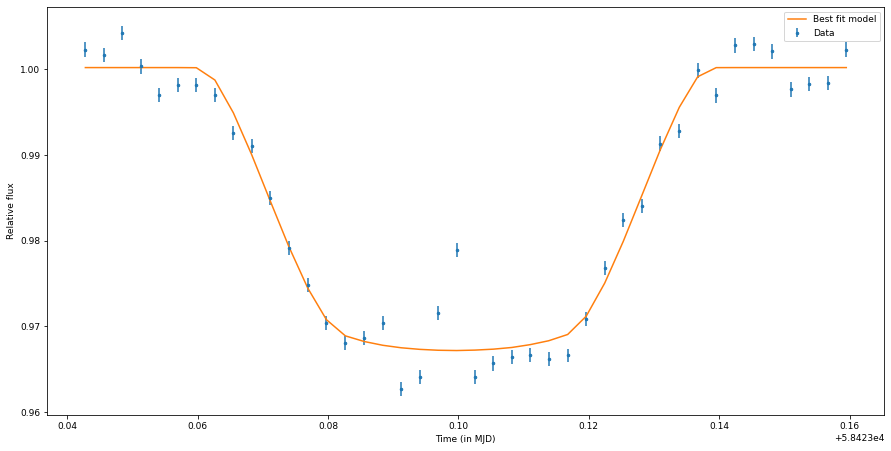

In [2]:
p1 = os.getcwd() + '/'
p2 = os.getcwd() + '/Fitting/'

dataset = jl.load(input_folder=p2, out_folder=p2)
rels = dataset.fit()

plt.figure(figsize=(15,7.5))
plt.errorbar(dataset.times_lc['EUL'], dataset.data_lc['EUL'], yerr=dataset.errors_lc['EUL'], fmt='.', label='Data')
plt.plot(dataset.times_lc['EUL'], rels.lc.evaluate('EUL'), label='Best fit model')
plt.legend(loc='best')
plt.xlabel('Time (in MJD)')
plt.ylabel('Relative flux')

## Best fit parameters

So, now let's extract best fit parameters from the fitting...

In [3]:
# For impact parameter and the transit depth
r1, r2 = rels.posteriors['posterior_samples']['r1_p1'], rels.posteriors['posterior_samples']['r2_p1']
imp_b, dep_p = jl.utils.reverse_bp(r1, r2, 0., 1.)

# For scaled semi-major axis
ast = rels.posteriors['posterior_samples']['a_p1']

# Transit central time
tt0 = rels.posteriors['posterior_samples']['t0_p1']

# For the limb darkening coefficients
q1, q2 = rels.posteriors['posterior_samples']['q1_EUL'], rels.posteriors['posterior_samples']['q2_EUL']
u1, u2 = jl.utils.reverse_ld_coeffs('quadratic', q1, q2)

print('Results:')
print('--------')
print('Square-root of the transit depth (Rp/R*): {:.4f} +/- {:.4f}'.format(np.mean(dep_p), np.std(dep_p)))
print('Impact parameter (b): {:.4f} +/- {:.4f}'.format(np.mean(imp_b), np.std(imp_b)))
print('Scaled semi-major axis (a/R*): {:.4f} +/- {:.4f}'.format(np.mean(ast), np.std(ast)))
print('Transit central time (t0): {:.4f} +/- {:.4f}'.format(np.mean(tt0), np.std(tt0)))
print('Limb darkening coefficient u1: {:.4f} +/- {:.4f}'.format(np.mean(u1), np.std(u1)))
print('Limb darkening coefficient u2: {:.4f} +/- {:.4f}'.format(np.mean(u2), np.std(u2)))

Results:
--------
Square-root of the transit depth (Rp/R*): 0.1791 +/- 0.0018
Impact parameter (b): 0.6914 +/- 0.0198
Scaled semi-major axis (a/R*): 6.8804 +/- 0.1534
Transit central time (t0): 58423.0995 +/- 0.0002
Limb darkening coefficient u1: 0.1258 +/- 0.0983
Limb darkening coefficient u2: 0.2749 +/- 0.1679


From the literature, we know the value of the stellar radii of the given star: $0.79 \pm 0.02 \ R_\odot$. From this information, we can find the actual physical parameters of the system such as the semi-major axis and the radius of the planet. We perform this analysis below:

In [4]:
# Stellar radii
rst = np.random.normal(0.79, 0.02, len(ast))*con.R_sun.value

# For semi-major axis
aa1 = ast*rst
aa2 = (aa1*u.m).to(u.au)
aa3 = aa2.value

# For planetary radii
rp = dep_p*rst
rp1 = rp/con.R_jup.value

print('Planetary parameters:')
print('---------------------')
print('Semi-major axis: {:.4f} +/- {:.4f} AU'.format(np.mean(aa3), np.std(aa3)))
print('Radius of the planet: {:.4f} +/- {:.4f} R_jup'.format(np.mean(rp1), np.std(rp1)))

Planetary parameters:
---------------------
Semi-major axis: 0.0253 +/- 0.0008 AU
Radius of the planet: 1.3764 +/- 0.0372 R_jup
